# Explore here

In [122]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import seaborn as sns
import statsmodels.api as sm
import xgboost as xgb
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler



In [123]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv').iloc[:,1:]
pd.set_option('display.max_columns',None)
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [124]:
df.shape

(48895, 15)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month               

In [126]:
df.isnull().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [127]:
has_negative_in_column = (df['price'] == 0).any()
print(has_negative_in_column)  
df_clean = df[df['price'] > 0]

True


In [128]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [129]:
print(df['price'].isna().sum())  


0


In [130]:
print(df['name'].duplicated().sum())

989


In [131]:
n_unicos = df.nunique()
n_unicos

name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [132]:
n_unicos[n_unicos<10].index

Index(['neighbourhood_group', 'room_type'], dtype='object')

In [133]:
df.duplicated().sum()

np.int64(0)

In [134]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,48895.00,67620010.65,78610967.03,2438.00,7822033.00,30793816.00,107434423.00,274321313.00
latitude,48895.00,40.73,0.05,40.50,40.69,40.72,40.76,40.91
longitude,48895.00,-73.95,0.05,-74.24,-73.98,-73.96,-73.94,-73.71
price,48895.00,152.72,240.15,0.00,69.00,106.00,175.00,10000.00
minimum_nights,48895.00,7.03,20.51,1.00,1.00,3.00,5.00,1250.00
number_of_reviews,48895.00,23.27,44.55,0.00,1.00,5.00,24.00,629.00
reviews_per_month,38843.00,1.37,1.68,0.01,0.19,0.72,2.02,58.50
calculated_host_listings_count,48895.00,7.14,32.95,1.00,1.00,1.00,2.00,327.00
availability_365,48895.00,112.78,131.62,0.00,0.00,45.00,227.00,365.00


<Axes: xlabel='price', ylabel='Density'>

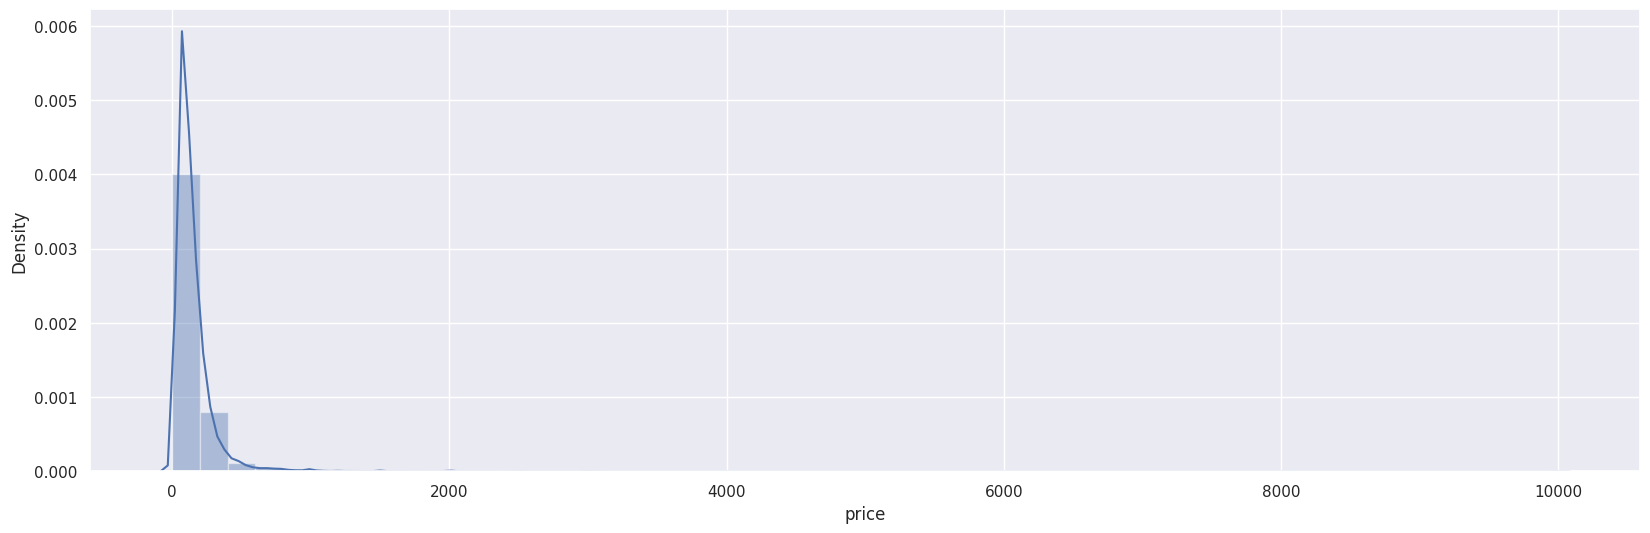

In [135]:
sns.set(rc={"figure.figsize": (20, 6)})
sns.distplot(df['price'],hist=True)

In [136]:
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 19.118939
Kurtosis: 585.672879


<Axes: xlabel='minimum_nights', ylabel='price'>

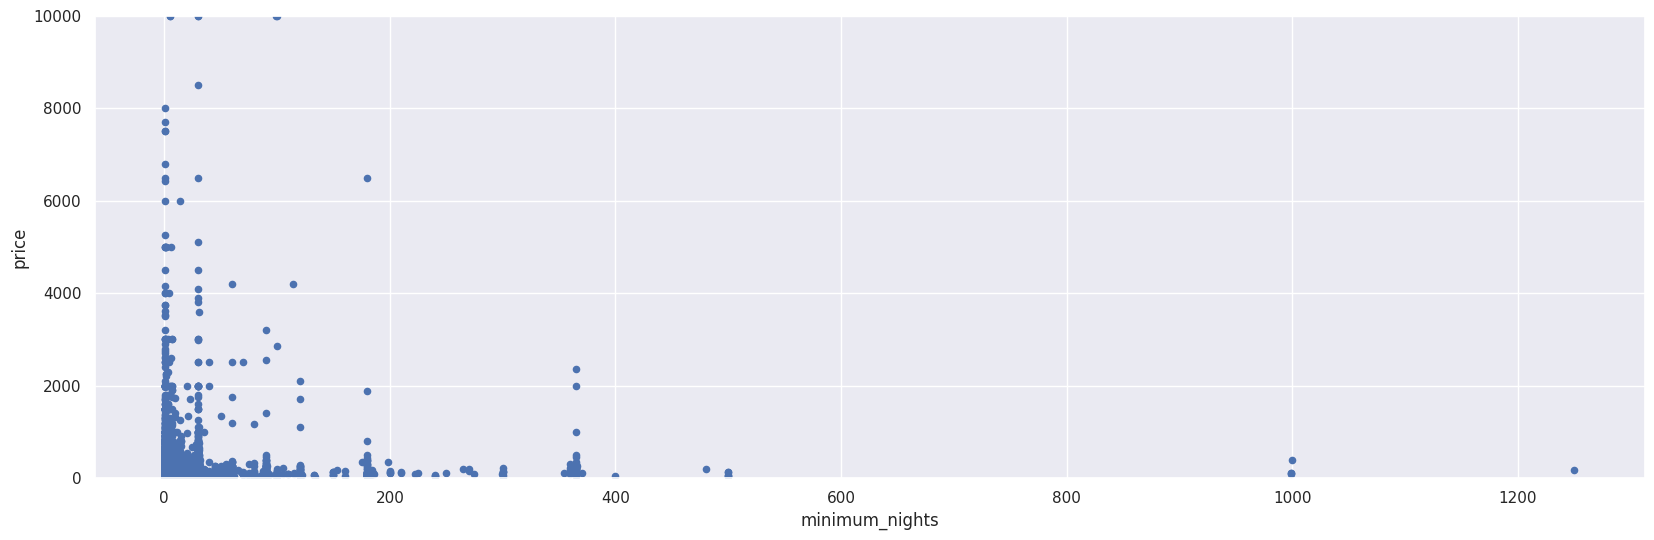

In [137]:
var='minimum_nights'

data=pd.concat([df['price'],df[var]],axis=1)
data.plot.scatter(x=var,y='price',ylim=(0,10000))

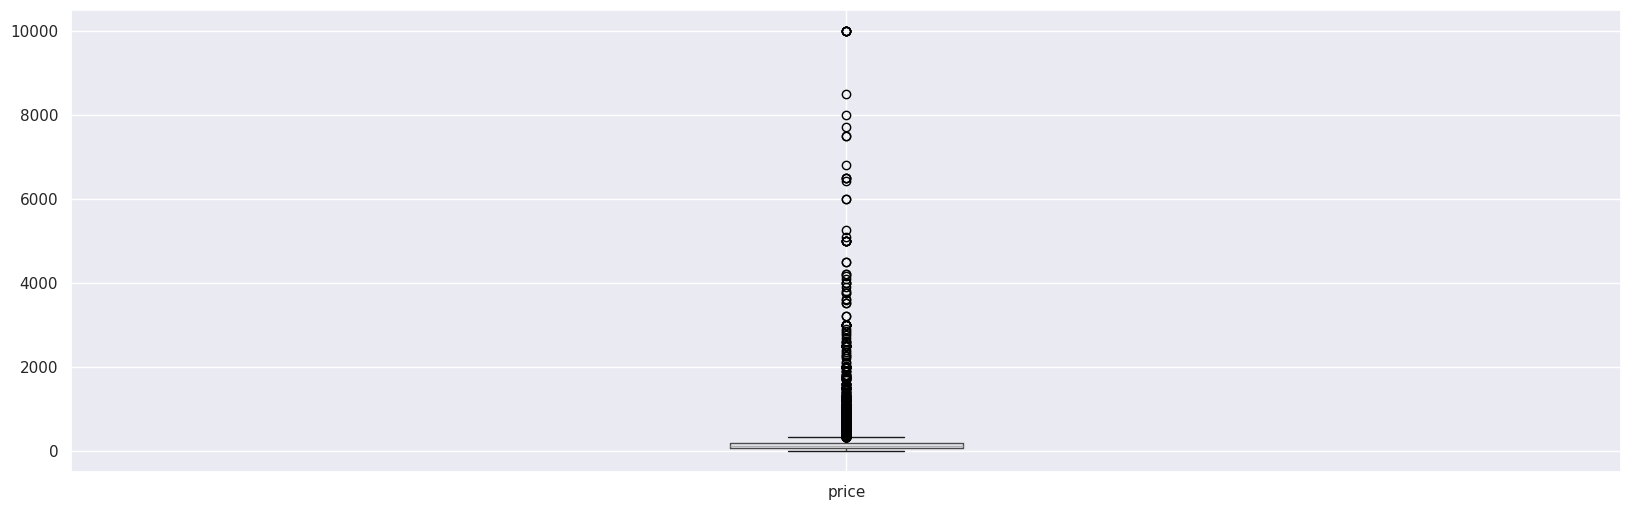

In [138]:
df.boxplot(column=['price'])
plt.show()

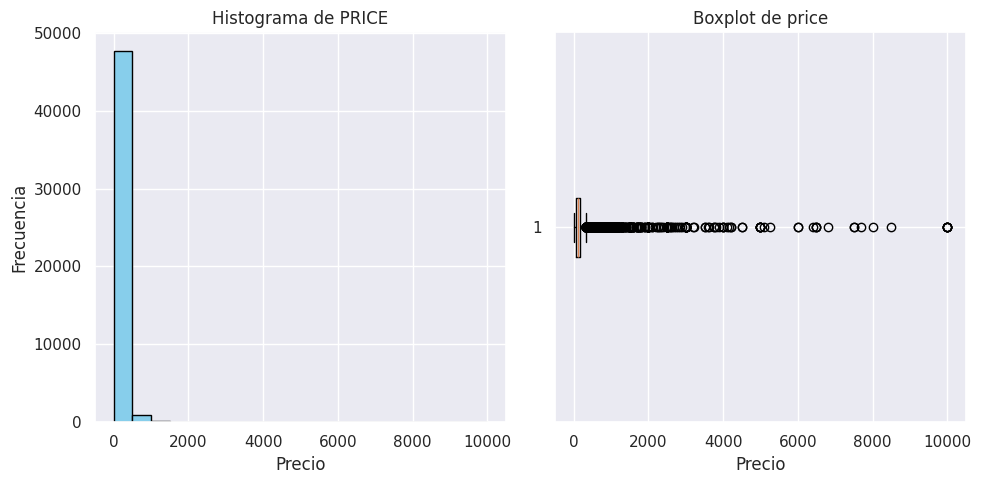

In [139]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['price'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de PRICE')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['price'], vert=False)
ax[1].set_title('Boxplot de price')
ax[1].set_xlabel('Precio')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [140]:
df['LOG_PRICE'] = np.log(df['price'])

In [141]:
df = df[df['price'] != 0]

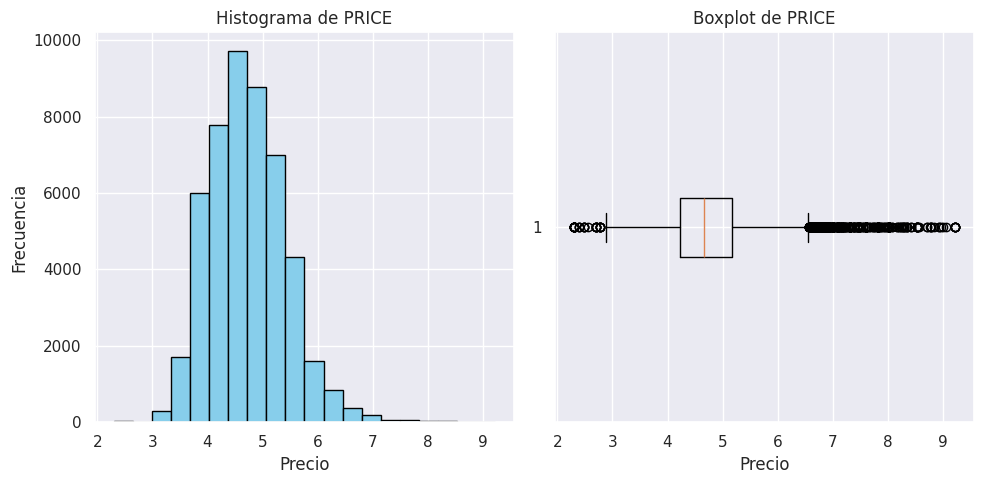

In [142]:
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['LOG_PRICE'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de PRICE')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['LOG_PRICE'], vert=False)
ax[1].set_title('Boxplot de PRICE')
ax[1].set_xlabel('Precio')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [143]:
has_negative = (df['price'] < 0).any()
print(has_negative)

False


In [144]:
df.isnull().mean()*100
'yesyeys'

name                              0.03
host_id                           0.00
host_name                         0.04
neighbourhood_group               0.00
neighbourhood                     0.00
latitude                          0.00
longitude                         0.00
room_type                         0.00
price                             0.00
minimum_nights                    0.00
number_of_reviews                 0.00
last_review                      20.56
reviews_per_month                20.56
calculated_host_listings_count    0.00
availability_365                  0.00
LOG_PRICE                         0.00
dtype: float64

In [145]:
df.isnull().any(axis=1).mean()*100

np.float64(20.605924228786517)

In [146]:
df.drop(["name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,LOG_PRICE
0,2787,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,6,365,5.00
1,2845,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2,355,5.42
2,4632,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,1,365,5.01
3,4869,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,1,194,4.49
4,7192,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,1,0,4.38


In [147]:
df.isnull().any(axis=1).mean()*100

np.float64(0.0)

<Axes: >

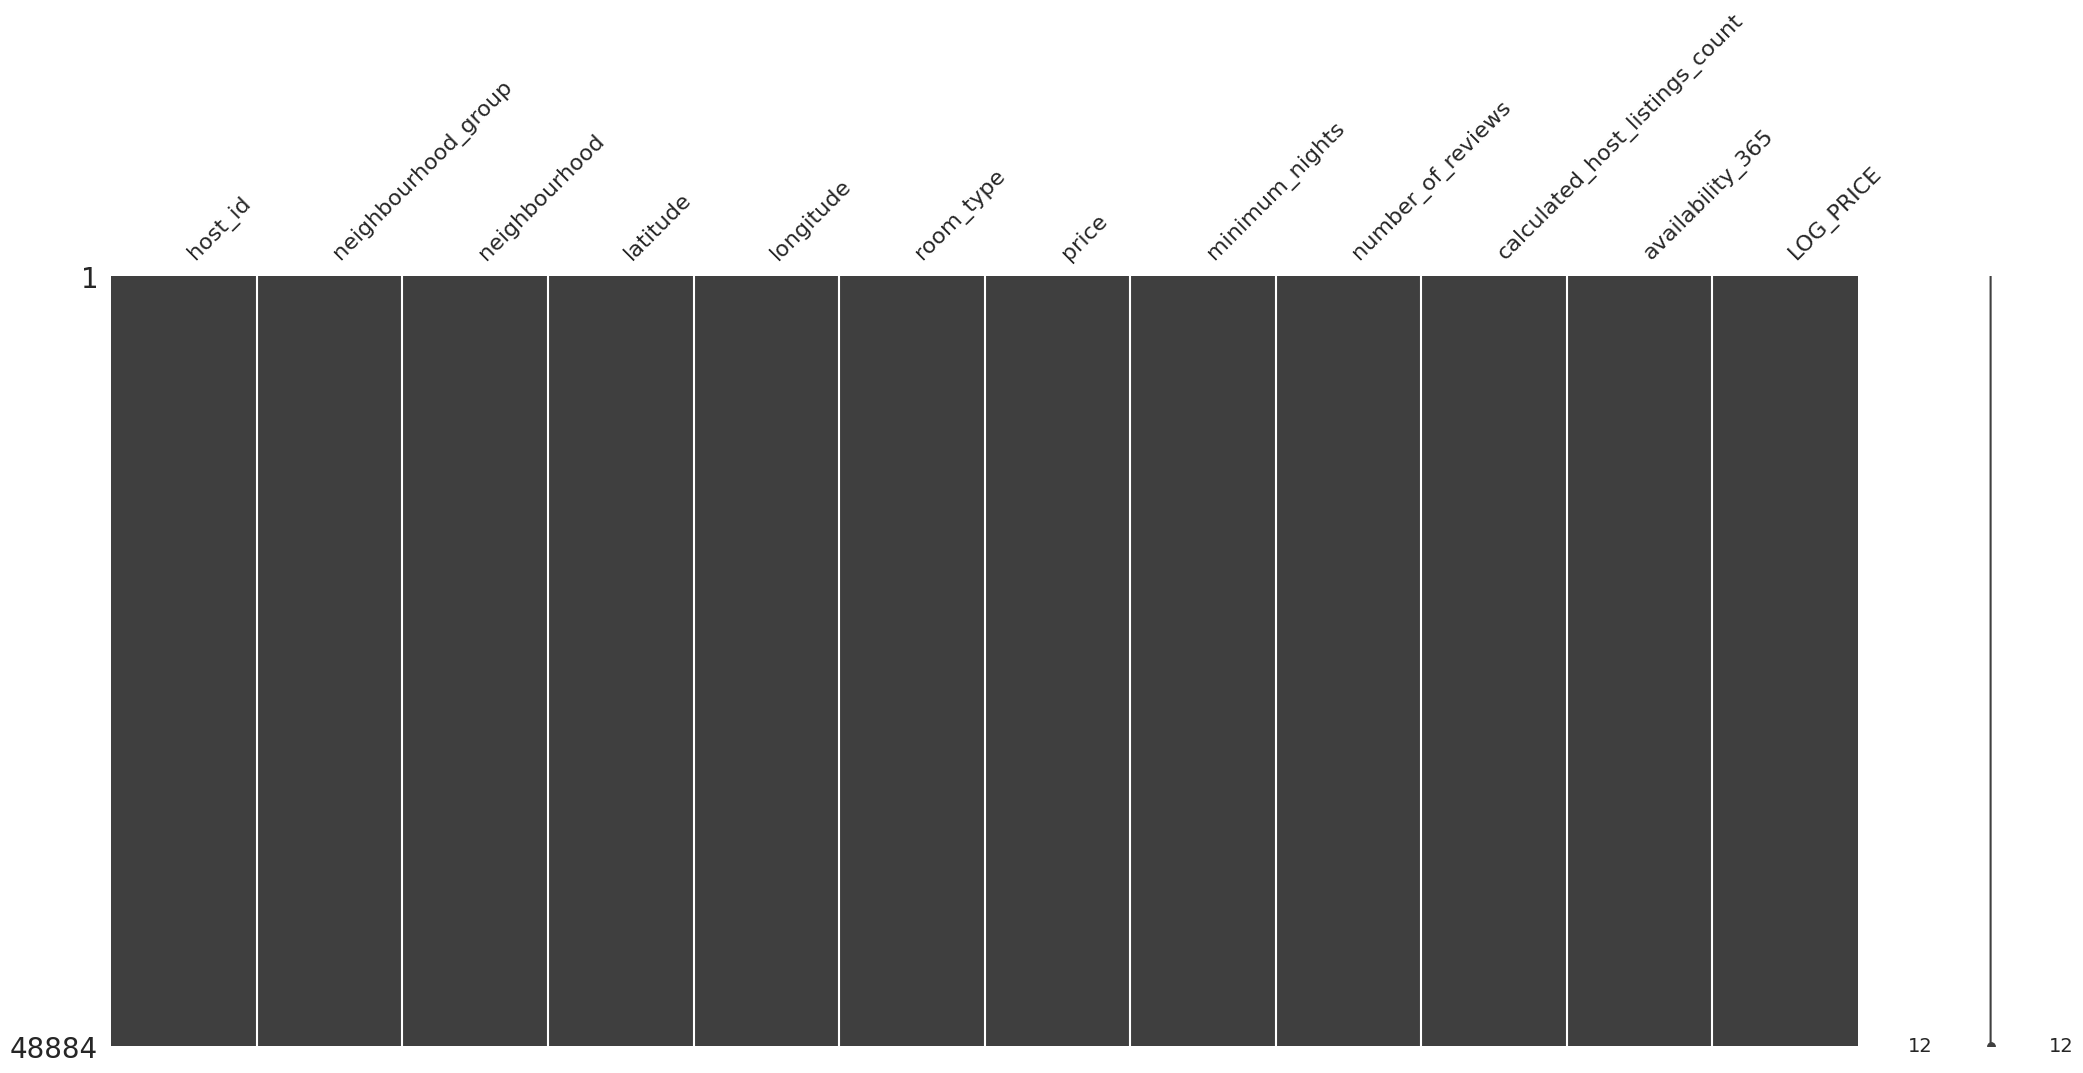

In [148]:
msno.matrix(df)

In [149]:
encoder = LabelEncoder()
encoder.fit(sorted(df_clean['neighbourhood_group'].unique()))
df_clean ['neighbourhood_group_int'] = encoder.transform (df['neighbourhood_group'])
encoder = LabelEncoder()

encoder.fit(sorted(df_clean['room_type'].unique()))
df_clean ['room_type_int'] = encoder.transform (df['room_type'])


#encoder = LabelEncoder()

# Encode 'neighbourhood_group'
#df_clean['neighbourhood_group_int'] = encoder.fit_transform(df_clean['neighbourhood_group'])

# Encode 'neighbourhood'
#df_clean['neighbourhood_int'] = encoder.fit_transform(df_clean['neighbourhood'])

# Encode 'room_type'
#df_clean['room_type_int'] = encoder.fit_transform(df_clean['room_type'])

df_clean['LOG_PRICE'] = np.log(df_clean['price'])

In [153]:
#X = df[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'availability_365']]
#y = df['price']
df_clean = df_clean.drop(['neighbourhood_group', 'neighbourhood', 'room_type'], axis=1)
#df_clean = df_clean.drop(['name','host_name','last_review'], axis=1)
X= df_clean.drop(['price','LOG_PRICE','room_type_int'], axis=1)
y=df_clean['LOG_PRICE']
# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X, missing='drop').fit()

# Calculate Cook's distance
influence = model.get_influence()
cooks_d, _ = influence.cooks_distance

# Plot Cook's distance

In [151]:
#df_clean.drop(["name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
#columns_to_drop = ['neighbourhood_group', 'neighbourhood', 'room_type']
#df_clean = df_clean.drop(columns=columns_to_drop)

print(df_clean.columns.tolist())
print(df_clean.dtypes)


['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group_int', 'room_type_int', 'LOG_PRICE']
host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
neighbourhood_group_int             int64
room_type_int                       int64
LOG_PRICE                         float64
dtype: object


In [154]:
print(X.shape)  # Shape of the feature matrix
print(y.shape)  # Shape of the target variable
X = X.dropna()
y = y.dropna()


(48884, 10)
(48884,)


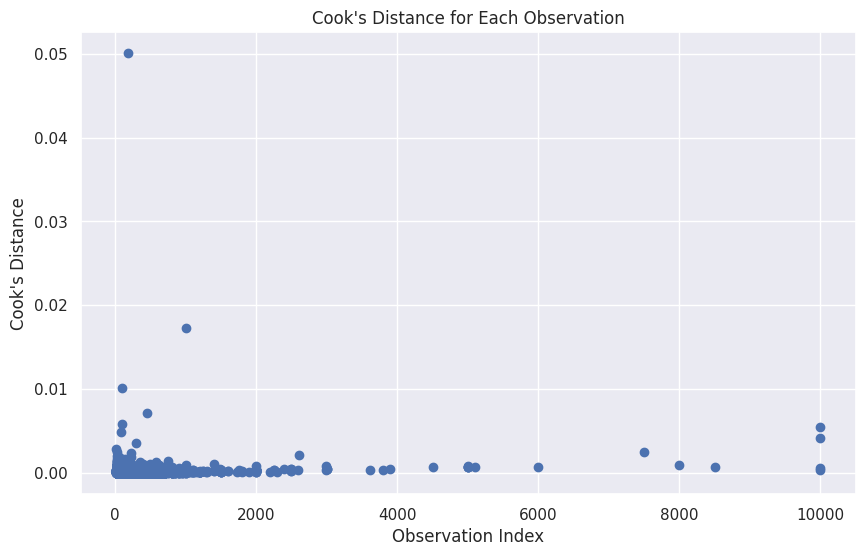

In [155]:
price_aligned = df_clean.loc[X.index, 'price']

plt.figure(figsize=(10, 6))
#plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.scatter(price_aligned, cooks_d)
plt.title("Cook's Distance for Each Observation")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()

In [156]:
# Covnertimos las columnas booleanas en float para evitar error (dtype_object) al ajecutar la celda
# X.loc[:, X.dtypes == 'bool'] = X.loc[:, X.dtypes == 'bool'].astype(float)

In [157]:
pto_corte = 4 / len(df_clean)

# Ensure cooks_d is at least 1D
cooks_d = np.atleast_1d(cooks_d)

# Find indices of viviendas (rows) above the cut-off
outliers = np.where(cooks_d > pto_corte)[0]

# Get the count of outliers
len_outliers = len(outliers)

print(f"Number of outliers: {len_outliers}")


Number of outliers: 2447


In [158]:
cooks_d = np.array(cooks_d)  # Ensure cooks_d is a numpy array

# Get indices where values in cooks_d are greater than 0.5
indices = np.where(cooks_d > 0.05)[0]

# Output the indices
print(f"Indices where values are greater than 0.5: {indices}")

Indices where values are greater than 0.5: [5247]


In [159]:
df_clean.iloc[5247,]


host_id                          3250450.00
latitude                              40.75
longitude                            -73.91
price                                 39.00
minimum_nights                        30.00
number_of_reviews                      9.00
reviews_per_month                      0.16
calculated_host_listings_count        18.00
availability_365                     318.00
neighbourhood_group_int                3.00
room_type_int                          1.00
LOG_PRICE                              3.66
Name: 5247, dtype: float64

In [160]:
cooks_d = np.atleast_1d(cooks_d)

# Drop rows where Cook's distance exceeds the threshold (pto_corte)
df1 = df_clean.drop(np.where(cooks_d > pto_corte)[0])

# Display the result
df1.duplicated().sum()


np.int64(0)

In [161]:
# Separamos las variables independientes de la dependiente
X = df1.drop(['price','LOG_PRICE','room_type_int'], axis=1)
y = df1['LOG_PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
df_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
df_imp

,Feature,Importance
2,longitude,28.60
1,latitude,14.27
6,calculated_host_listings_count,13.70
8,neighbourhood_group_int,10.56
3,minimum_nights,8.90
7,availability_365,8.68
0,host_id,5.22
4,number_of_reviews,5.22
5,reviews_per_month,4.85


In [163]:
df_imp[df_imp.Importance>1]['Feature'].values

array(['longitude', 'latitude', 'calculated_host_listings_count',
       'neighbourhood_group_int', 'minimum_nights', 'availability_365',
       'host_id', 'number_of_reviews', 'reviews_per_month'], dtype=object)

In [164]:
X_train = X_train[df_imp[df_imp.Importance>1]['Feature'].values]
X_test = X_test[df_imp[df_imp.Importance>1]['Feature'].values]

In [165]:
X_train.corr()

,longitude,latitude,calculated_host_listings_count,neighbourhood_group_int,minimum_nights,availability_365,host_id,number_of_reviews,reviews_per_month
longitude,1.00,0.08,-0.11,0.10,-0.06,0.08,0.12,0.06,0.15
latitude,0.08,1.00,0.02,0.28,0.02,-0.01,0.02,-0.02,-0.01
calculated_host_listings_count,-0.11,0.02,1.00,0.07,0.13,0.23,0.16,-0.07,-0.01
neighbourhood_group_int,0.10,0.28,0.07,1.00,0.02,0.08,0.11,-0.00,0.07
minimum_nights,-0.06,0.02,0.13,0.02,1.00,0.15,-0.01,-0.08,-0.12
availability_365,0.08,-0.01,0.23,0.08,0.15,1.00,0.21,0.17,0.19
host_id,0.12,0.02,0.16,0.11,-0.01,0.21,1.00,-0.14,0.30
number_of_reviews,0.06,-0.02,-0.07,-0.00,-0.08,0.17,-0.14,1.00,0.55
reviews_per_month,0.15,-0.01,-0.01,0.07,-0.12,0.19,0.30,0.55,1.00


In [166]:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

longitude                        1.30
latitude                         1.42
calculated_host_listings_count   1.53
neighbourhood_group_int          1.52
minimum_nights                   1.27
availability_365                 1.93
host_id                          3.47
number_of_reviews                6.48
reviews_per_month                7.64
dtype: float64

<Axes: >

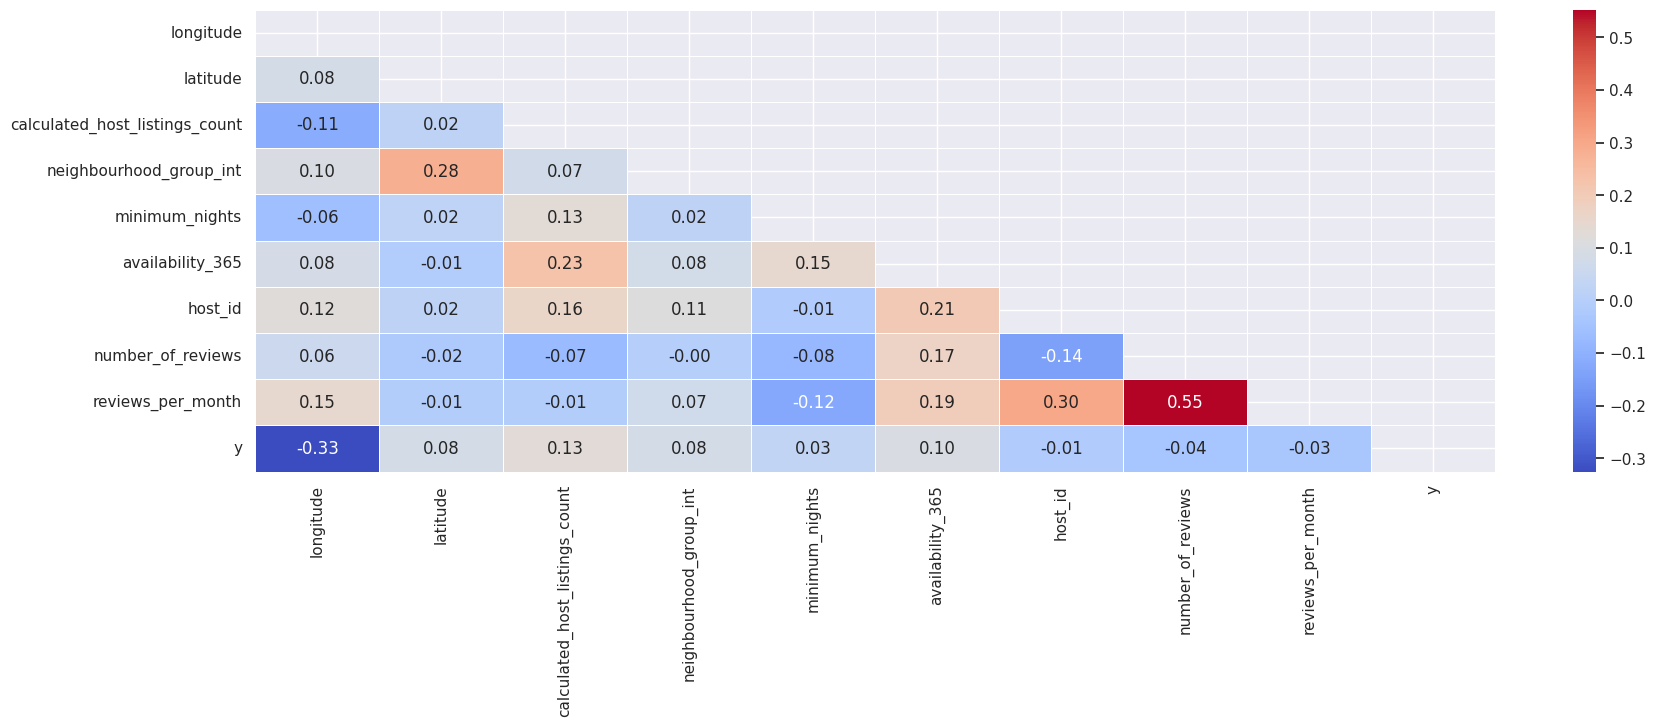

In [167]:
X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

In [168]:
X_train['AREA'] = X_train['latitude']*X_train['longitude']
X_test['AREA'] = X_test['latitude']*X_test['longitude']

In [169]:
X_train.drop(['neighbourhood_group_int', 'latitude', 'longitude'], axis=1, inplace=True)
X_test.drop(['neighbourhood_group_int', 'latitude', 'longitude'], axis=1, inplace=True)

In [170]:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

calculated_host_listings_count   1.43
minimum_nights                   1.26
availability_365                 1.88
host_id                          3.36
number_of_reviews                6.46
reviews_per_month                7.47
AREA                             1.06
dtype: float64

In [171]:

binary_cols = X_train[(X_train == 0)|(X_train == 1)].dropna(axis=1).columns
binary_cols

Index([], dtype='object')

In [172]:
X_train_num = X_train.drop(binary_cols, axis=1)
X_test_num = X_test.drop(binary_cols, axis=1)

In [173]:
scaler = MinMaxScaler().fit(X_train_num)

In [174]:
X_ẗrain_num_sc = scaler.transform(X_train_num)
X_ẗest_num_sc = scaler.transform(X_test_num)

In [175]:
X_train_sc = pd.concat([pd.DataFrame(X_ẗrain_num_sc, columns = X_train_num.columns), X_train[binary_cols].reset_index(drop=True)], axis=1)
X_test_sc = pd.concat([pd.DataFrame(X_ẗest_num_sc, columns = X_test_num.columns), X_test[binary_cols].reset_index(drop=True)], axis=1)

In [176]:
X_train_sc

,calculated_host_listings_count,minimum_nights,availability_365,host_id,number_of_reviews,reviews_per_month,AREA
0,0.01,0.00,0.46,0.68,0.04,0.25,0.39
1,0.00,0.00,0.00,0.02,0.02,0.01,0.53
2,0.01,0.00,0.00,0.44,0.00,0.00,0.73
3,0.00,0.00,0.00,0.32,0.00,0.00,0.47
4,0.00,0.00,0.98,0.19,0.01,0.00,0.60
...,...,...,...,...,...,...,...
37144,0.00,0.01,0.00,0.02,0.00,0.00,0.48
37145,0.00,0.00,0.49,0.64,0.00,NaN,0.63
37146,0.01,0.01,0.51,0.62,0.00,NaN,0.38
37147,0.00,0.00,0.00,0.00,0.00,NaN,0.39


In [ ]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train_sc, X_test_sc, y_train, y_test)

 21%|██▏       | 9/42 [00:17<01:36,  2.93s/it]

GaussianProcessRegressor model failed to execute
Unable to allocate 10.3 GiB for an array with shape (37149, 37149) and data type float64


 36%|███▌      | 15/42 [00:23<00:34,  1.29s/it]

KernelRidge model failed to execute
Unable to allocate 10.3 GiB for an array with shape (37149, 37149) and data type float64


 71%|███████▏  | 30/42 [01:50<01:17,  6.43s/it]

In [60]:
print(models)

NameError: name 'models' is not defined